In [1]:
import matplotlib.pyplot as plt
import math

# Euclidean distance between points
def eucl_distance(p, q):
    
    return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)


Total of  360 asteroids. Here is a map


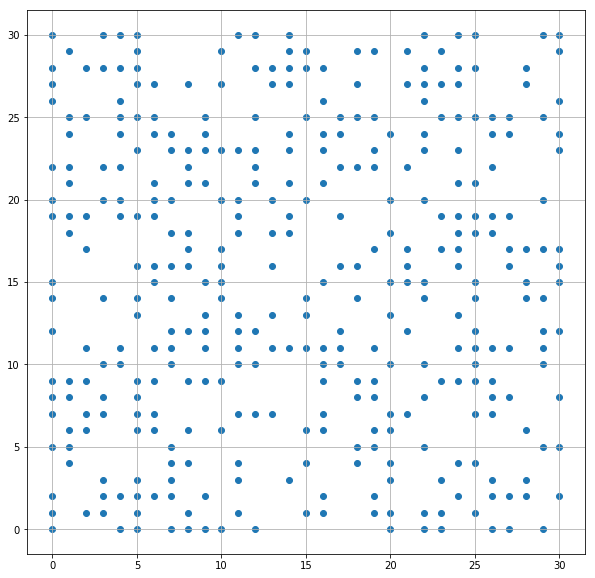

In [103]:
# Initialize coordinate map. We can use a more usual coordinate system with the y-axis pointing upwards
# (instead of the one suggested in the problem, with y-axis pointing downwards). We will need to go back on this
# in part 2. 
coordinate_map = []
y_line = 0
with open('input.txt', 'r') as infile:
    for line in infile.readlines():
        split = list(line.replace('\n', ''))
        for i in range(len(split)):
            if split[i] == '#':
                coordinate_map.append([i, y_line])
        y_line += 1

print('Total of ', len(coordinate_map), 'asteroids. Here is a map')
x = [item[0] for item in coordinate_map]
y = [item[1] for item in coordinate_map]
plt.figure(figsize=(10, 10))
plt.scatter(x, y)        
plt.grid()

In [96]:
# To find the total number of visible asteroid from a position, we use two key facts:
# - given a base asteroid, for every othe asteroid we can compute an angle (measured for example from
#   the x-axis in the counter-clockwise direction as it is standard to do) that corresponds to it 
# - this angle does not uniquely identify the asteroid, however, since two asteroids lying on the same
# - line in the plane (passing also from the base), will have the same angle
# The 'set()' data type is perfect for this situation! When we add an element to a set that already contains
# that element, nothing is done. So by cycling thourgh the set of asteroids, with a fixed base, we can add 
# all their angles to a set and by the end the numerosity of the set is just the  number of asteroids detected
# from that fixed base. The maximum of this values identifies the desired base

detected = 0
optimal = []

for point in coordinate_map:
    angles = set()
    
    for another in coordinate_map:
        
        if point == another:
            continue

        d = eucl_distance(point, another)
        sin = round((point[1] - another[1])/d, 7)# *** see below!!
        cos = round((point[0] - another[0])/d, 7)
        # Create hashable string unique to the angle
        angles.add(str(sin)+'&'+str(cos))
    
    count = len(angles)
    if count > detected:
        detected = count
        optimal = point[:]
        
# VERY IMPORTANT OBSERVATION:
# The method just implemented is error-proof in theory, but not on a computer: the same fraction can (and will) 
# be approximated by different floating point values on the machine. In our case, this means that
# even if base-A1-A2 all lie on a plane, the angles base-A1 and base-A2 can be different in their last digit, and 
# would be added as different elements in the set. Now, if we had a map so big that THIS LITLE
# DIFFERENCE between angles was comparable to the angular distance of two asteroids as seen from the base, 
# all this would be a problem: the resolution would be to low to tell if two asteroids are in fact on
# the same line or not. However this is not our case, and that is why we used the 'round(, 7)' function 
# to keep only the first 7 digits  after the 0 ('7' is an arbitrary decision made after looking for some time 
# at the numerical values). This way we 'wash out' all the details and possible sources of error which
# arise due to the way python approximate fractions with floating point values, and we can be sure that
# we only add to the set actually different angles corresponding to not-in-line asteroids.

In [106]:
# Here is the result
print('Maximum number of detected asteroids is', detected, ', from base asteroid ', optimal)

Maximum number of detected asteroids is 288 , from base asteroid  [17, 22]


### Part 2: the Giant Laser

In [98]:
# Since the asteroid in [17, 22] can directly see 288 other asteroids, it follows that the 
# 200th asteroid that will be vaporized is one of those who are visible from our base.
# This is useful since, using the same method as before (taking advantage of the 'set()' method)
# we can do
base = optimal[:]
# Again use set(), since it automatically handles equal elements
angles = set()

# Initialize set of all angles at which we can see an asteroid from our base.
# Angles are identified again by corresponding sine and cosine values, this time we measure
# them starting from the vertical axis
for asteroid in coordinate_map:
    
    if asteroid == base:
        continue
    
    else:
        d = eucl_distance(base, asteroid)
        sin = round((asteroid[0] - base[0])/d, 7)
        cos = round((asteroid[1] - base[1])/d, 7)
        # Create unique hashable that can be added to set
        angles.add(str(sin)+'&'+str(cos))

# Now that angles contain all the angles of the asteroids that can be detected from our base, 
# convert it back to list so that we can order it
angles = [item.split('&') for item in angles]
angles = [[float(item[0]), float(item[1])] for item in angles]
# Check if we are loosing something
print(len(angles))

288


In [101]:
from operator import itemgetter

# Now sorting is not trivial, as we would like to sort points in clockwise direction starting from 
# the North. MORE IMPORTNATLY, we must now take care of the fact that the coordinate system we 
# are using has the positive y-axis facing 'upwards' while the one that the exercise makes reference
# to has the y-axis pointing 'downwards'. This was not a problem in part 1, since the total number of visible
# asteroids is independent of this fact. However, the 'clockwise' specification of part 2 is clearly
# affected by this choice. In practice, we must rotate counter-clockwise in our system.

#We can do it this way: first separate the list in two pieces
# positive sine half:
positive_sine = [angle for angle in angles if angle[0] >= 0]
# negative sine half
negative_sine = [angle for angle in angles if angle[0] < 0]

# This are still non-ordered list, but we can now sort them. In each of them, the cosine function
# goes the full range from -1 to 1 (remember angles are here measured starting from the y-axis). 
# We can then order the positive sine part with cosine going from '1' to '1', as in
positive_sine = sorted(positive_sine, key=itemgetter(1))
# and the negative part by reversing the order (from '1' to '-1') and close the cycle
negative_sine = sorted(negative_sine, key=itemgetter(1), reverse = True)

# The list of sorted angles can now be constructed as
sorted_angles = positive_sine + negative_sine

# Check we have not lost any angle in the process 
print(len(sorted_angles))
#The 200th element of the list should be given by
print('200th on the VAPORIZING list is at angle: ', sorted_angles[199])

288
200th on the VAPORIZING list is:  [-0.8778956, -0.4788521]


In [102]:
# The last effort is to find the actual asteroid (i.e. its coordinate).
# Knowing the angle, we must be careful to select, of all asteroids that form said angle
# with the base, the one which is also nearest to the base, since it will be the first to go.

bet_on_this_one = []
# Initialize a distance to a big initial value
distance = 1000

for asteroid in coordinate_map:
    
    if asteroid == base:
        continue
    
    else:
        d = eucl_distance(base, asteroid)
        sin = round((asteroid[0] - base[0])/d, 7)
        cos = round((asteroid[1] - base[1])/d, 7)
        
        # If current asteroid has sine and cosine values equals to the one we are looking for, 
        # and if its distance is also smaller than the current one, then update.
        if [sin, cos] == sorted_angles[199] and d < distance:
            bet_on_this_one = asteroid
            distance = d

            
print('200th on the VAPORIZING list is asteroid at: ', bet_on_this_one)
print('Target value: ',  bet_on_this_one[0]*100 + bet_on_this_one[1])

200th on the VAPORIZING list is asteroid at:  [6, 16]
Target value:  616
